### What is RFM Analysis?
The RFM model is a customer segmentation technique. RFM stands for Recency, Frequency, and Monetary value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer's behavior because frequency and monetary value affects a customer's lifetime value, and recency affects retention, a measure of engagement.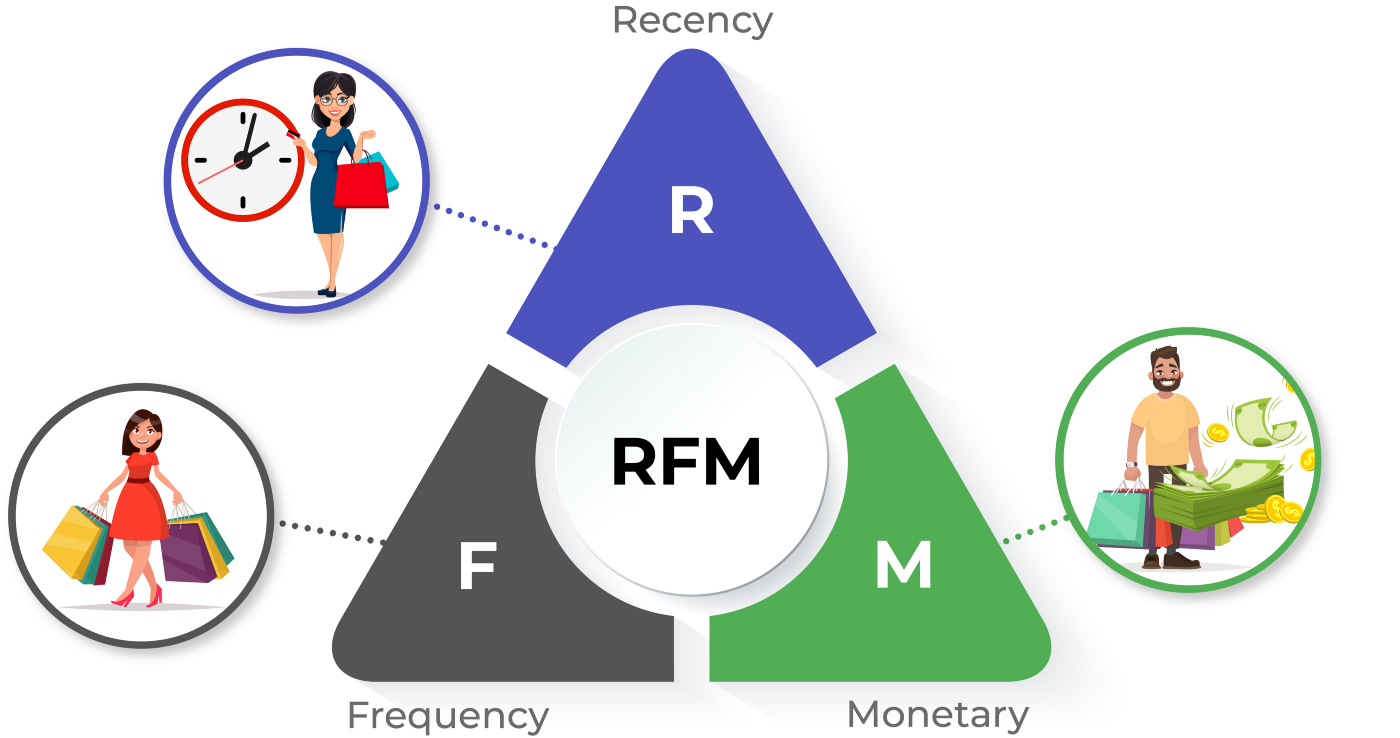

**RFM** is an acronym of recency, frequency and monetary.
* **Recency** is about when was the last order of a customer. It means the number of days since a customer made the last purchase. If it’s a case for a website or an app, this could be interpreted as the last visit day or the last login time.  
**(How many days have passed since the last purchase?)**

* **Frequency** is about the number of purchase in a given period. It could be 3 months, 6 months or 1 year. So we can understand this value as for how often or how many a customer used the product of a company. The bigger the value is, the more engaged the customers are. Could we say them as our VIP? Not necessary. Cause we also have to think about how much they actually paid for each purchase, which means monetary value.  

* **Monetary** is the total amount of money a customer spent in that given period.  n period.  

### Importing Necessary Libraries

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing the data
df = pd.read_excel('Sample - Superstore.xls',index_col=None,header=0)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2020-103800,2020-01-03,2020-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2020-112326,2020-01-04,2020-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2020-112326,2020-01-04,2020-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2020-112326,2020-01-04,2020-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2020-141817,2020-01-05,2020-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          10194 non-null  int64         
 1   Order ID        10194 non-null  object        
 2   Order Date      10194 non-null  datetime64[ns]
 3   Ship Date       10194 non-null  datetime64[ns]
 4   Ship Mode       10194 non-null  object        
 5   Customer ID     10194 non-null  object        
 6   Customer Name   10194 non-null  object        
 7   Segment         10194 non-null  object        
 8   Country/Region  10194 non-null  object        
 9   City            10194 non-null  object        
 10  State/Province  10194 non-null  object        
 11  Postal Code     10194 non-null  object        
 12  Region          10194 non-null  object        
 13  Product ID      10194 non-null  object        
 14  Category        10194 non-null  object        
 15  Su

In [4]:
df.describe()

,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Profit
count,10194.000000,10194,10194,10194.000000,10194.000000,10194.000000,10194.000000
mean,5097.500000,2022-04-29 16:37:51.453796608,2022-05-03 15:41:38.175397120,228.225854,3.791838,0.155385,28.673417
min,1.000000,2020-01-03 00:00:00,2020-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2549.250000,2021-05-14 00:00:00,2021-05-19 00:00:00,17.220000,2.000000,0.000000,1.760800
50%,5097.500000,2022-06-25 00:00:00,2022-06-28 00:00:00,53.910000,3.000000,0.200000,8.690000
75%,7645.750000,2023-05-14 00:00:00,2023-05-18 00:00:00,209.500000,5.000000,0.200000,29.297925
max,10194.000000,2023-12-30 00:00:00,2024-01-05 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,2942.898656,NaN,NaN,619.906839,2.228317,0.206249,232.465115


In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State/Province', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

### Min and Max Order Dates

In [6]:
df['Order Date'].min(), df['Order Date'].max()

(Timestamp('2020-01-03 00:00:00'), Timestamp('2023-12-30 00:00:00'))

### Recency of each customer

In [7]:
df_recency = df.groupby(by='Customer Name',
                       as_index=False)['Order Date'].max()  # Order date will be the last (Latest) order date.

df_recency.columns = ['CustomerName', 'LastPurchaseDate']

recent_date = df_recency['LastPurchaseDate'].max()

df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)

df_recency.head()

,CustomerName,LastPurchaseDate,Recency
0,Aaron Bergman,2022-11-10,415
1,Aaron Hawkins,2023-12-18,12
2,Aaron Smayling,2023-10-03,88
3,Adam Bellavance,2023-11-06,54
4,Adam Hart,2023-11-26,34


In [8]:
recent_date = df_recency['LastPurchaseDate'].max()
recent_date

Timestamp('2023-12-30 00:00:00')

### Frequency of each customer

In [9]:
frequency_df = df.drop_duplicates().groupby(
by=['Customer Name'], as_index=False)['Order Date'].count()

frequency_df.columns = ['CustomerName', 'Frequency']
frequency_df.head()

,CustomerName,Frequency
0,Aaron Bergman,6
1,Aaron Hawkins,11
2,Aaron Smayling,10
3,Adam Bellavance,18
4,Adam Hart,20


### Monetary value for each customer

In [10]:
df['Total'] = df['Sales']*df['Quantity']
monetary_df = df.groupby(by='Customer Name', as_index=False)['Total'].sum()

monetary_df.columns = ['CustomerName', 'Monetary']

monetary_df.head()

,CustomerName,Monetary
0,Aaron Bergman,1984.480
1,Aaron Hawkins,11459.552
2,Aaron Smayling,9088.880
3,Adam Bellavance,35390.580
4,Adam Hart,9664.265


### Creating an RFM Dataframe

In [11]:
rf_df = df_recency.merge(frequency_df, on='CustomerName')
rfm_df = rf_df.merge(monetary_df, on='CustomerName').drop(columns='LastPurchaseDate')
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary
0,Aaron Bergman,415,6,1984.480
1,Aaron Hawkins,12,11,11459.552
2,Aaron Smayling,88,10,9088.880
3,Adam Bellavance,54,18,35390.580
4,Adam Hart,34,20,9664.265


In [12]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)


rfm_df.head()

,CustomerName,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
0,Aaron Bergman,415,6,1984.480,71.5,103.5,87.0
1,Aaron Hawkins,12,11,11459.552,719.5,362.5,447.0
2,Aaron Smayling,88,10,9088.880,364.5,305.0,369.0
3,Adam Bellavance,54,18,35390.580,470.5,646.0,736.0
4,Adam Hart,34,20,9664.265,577.0,694.0,390.0


### Normalizing the rank of customers

In [13]:
# Bring in the range of 0 to 1 * 100
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['M_rank']/rfm_df['M_rank'].max())*100

rfm_df.head()

,CustomerName,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm
0,Aaron Bergman,415,6,1984.480,71.5,103.5,87.0,8.959900,12.9375,10.875
1,Aaron Hawkins,12,11,11459.552,719.5,362.5,447.0,90.162907,45.3125,55.875
2,Aaron Smayling,88,10,9088.880,364.5,305.0,369.0,45.676692,38.1250,46.125
3,Adam Bellavance,54,18,35390.580,470.5,646.0,736.0,58.959900,80.7500,92.000
4,Adam Hart,34,20,9664.265,577.0,694.0,390.0,72.305764,86.7500,48.750


### Dropping the Columns ['R_rank', 'F_Rank','M_rank']

In [14]:
# It is in normalized form, thats why we are dropping the r,f and m rank.
rfm_df.drop(columns=['R_rank', 'F_rank','M_rank'], inplace=True)

rfm_df.head()

,CustomerName,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,Aaron Bergman,415,6,1984.480,8.959900,12.9375,10.875
1,Aaron Hawkins,12,11,11459.552,90.162907,45.3125,55.875
2,Aaron Smayling,88,10,9088.880,45.676692,38.1250,46.125
3,Adam Bellavance,54,18,35390.580,58.959900,80.7500,92.000
4,Adam Hart,34,20,9664.265,72.305764,86.7500,48.750


### RFM Score

In [15]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+ \
                      0.28 *rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm'] # \ is for next line (formula)

rfm_df["RFM_Score"]*= 0.05     # Bring in range of (0 to 100) -->  (0 to 5) 
rfm_df = rfm_df.round(2)
rfm_df[['CustomerName', 'RFM_Score']].head(20)
#rfm_df['RFM_Score'].min()

,CustomerName,RFM_Score
0,Aaron Bergman,0.56
1,Aaron Hawkins,2.90
2,Aaron Smayling,2.19
3,Adam Bellavance,4.19
4,Adam Hart,3.15
5,Adam Shillingsburg,3.80
6,Adrian Barton,4.56
7,Adrian Hane,2.63
8,Adrian Shami,0.60
9,Aimee Bixby,1.69


In [16]:
rfm_df['RFM_Score'].describe()

count    800.000000
mean       2.504175
std        1.185988
min        0.050000
25%        1.527500
50%        2.570000
75%        3.470000
max        4.820000
Name: RFM_Score, dtype: float64

### Rating Customer based upon the RFM Score
* rfm score>4.5: Top Customer
* 4.5 > rfm score > 4 : High Value Customer
* 4>rfm score >3 : Medium value Customer
* 3>rfm score>1.5 : Low value customer
* rfm score<1.5 : Lost customer

In [17]:
rfm_df['Customer_segment'] = np.where(rfm_df['RFM_Score'] > 4.5,
                                     "Top Customers",
                                     (np.where(
                                     rfm_df['RFM_Score'] > 4,
                                     "High Value customer",
                                     (np.where(
                                     rfm_df['RFM_Score'] > 3,
                                     "Medium value customer",
                                     np.where(rfm_df['RFM_Score'] > 1.5,
                                             'Low value Customers', 'Lost Customers'))))))

rfm_df[['CustomerName', 'RFM_Score', 'Customer_segment']].head(20)

,CustomerName,RFM_Score,Customer_segment
0,Aaron Bergman,0.56,Lost Customers
1,Aaron Hawkins,2.90,Low value Customers
2,Aaron Smayling,2.19,Low value Customers
3,Adam Bellavance,4.19,High Value customer
4,Adam Hart,3.15,Medium value customer
5,Adam Shillingsburg,3.80,Medium value customer
6,Adrian Barton,4.56,Top Customers
7,Adrian Hane,2.63,Low value Customers
8,Adrian Shami,0.60,Lost Customers
9,Aimee Bixby,1.69,Low value Customers


In [18]:
#?rfm_df.plot

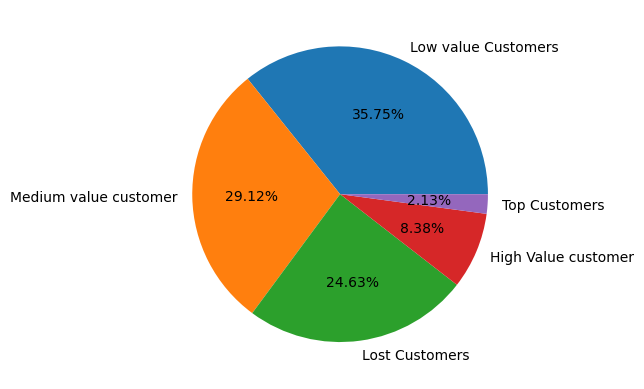

In [19]:
rfm_df['Customer_segment'].value_counts().plot(kind="pie", autopct="%1.2f%%");
plt.ylabel(" ");

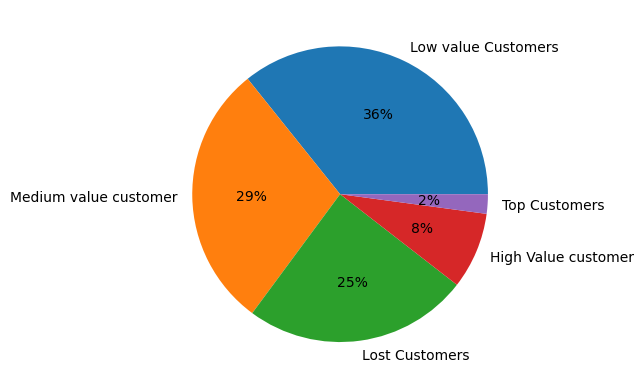

In [20]:
import matplotlib.pyplot as plt
plt.pie(rfm_df.Customer_segment.value_counts(),
       labels=rfm_df.Customer_segment.value_counts().index,
       autopct='%.0f%%')
plt.show()

Accoring to customer segment there are low customer segment where most of customers are low value, the high value customers is 4 and 4.5